In [1]:
from pathlib import Path

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from load_datasets import load_all_csvs

In [2]:
df = load_all_csvs(
    Path("../results/remote"),
    [
        "problem_set_1",
        "1d",
        "2d",
        "3d",
    ],
)

df.describe()

,mu_size,nu_size,cost,iterations,error,cost_rerr,time,time_counter,peak_gpu_mem,combined_peak_gpu_ram,peak_gpu_util_pct,mean_gpu_util_pct,peak_ram_MiB,combined_peak_ram_MiB,max_cpu_util_pct,mean_cpu_util_pct,reg,maxiter,tol
count,25789.000000,25789.000000,23719.000000,22325.000000,2.371900e+04,2.371900e+04,25789.000000,25789.000000,25789.000000,25789.000000,25789.000000,25789.000000,25789.000000,25789.000000,25789.000000,25789.000000,22325.000000,22325.000000,22325.000000
mean,2200.255303,2200.255303,23.171081,14974.439015,5.389004e-03,5.190982e+02,4.897141,4.825228,729.206096,729.206096,54.649734,44.215960,0.757851,0.757851,0.578705,0.501911,0.313745,34849.272116,0.000001
std,3409.506926,3409.506926,45.450410,25257.167621,2.617820e-02,3.003402e+04,14.875163,14.867759,1076.607642,1076.607642,40.459818,36.302333,0.948243,0.948243,0.353136,0.311397,0.460358,40237.056133,0.000000
min,16.000000,16.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.001394,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,10000.000000,0.000001
25%,128.000000,128.000000,0.015767,1811.000000,8.713163e-07,2.995058e-03,0.223847,0.060927,546.000000,546.000000,0.000000,0.000000,0.176902,0.176902,0.080469,0.080469,0.001000,10000.000000,0.000001
50%,512.000000,512.000000,4.678354,10000.000000,5.067864e-06,2.922849e-01,0.479316,0.446815,554.000000,554.000000,71.000000,47.500000,0.880542,0.880542,0.785937,0.634896,0.010000,10000.000000,0.000001
75%,4096.000000,4096.000000,23.659775,10000.000000,5.813274e-05,9.994696e-01,2.454836,2.364158,646.000000,646.000000,90.000000,74.250000,1.090183,1.090183,0.806250,0.761632,1.000000,100000.000000,0.000001
max,16384.000000,16384.000000,395.214328,100000.000000,6.247923e-01,2.926190e+06,144.876696,144.803525,8746.000000,8746.000000,100.000000,100.000000,12.444738,12.444738,2.300781,0.834375,1.000000,100000.000000,0.000001


In [3]:
df.head()

,dataset,mu_size,nu_size,cost,iterations,error,cost_rerr,time_unit,time,time_counter,...,peak_ram_MiB,combined_peak_ram_MiB,max_cpu_util_pct,mean_cpu_util_pct,status,name,reg,maxiter,tol,__source_file__
0,1D-cauchy-32p,32,32,28.958300,301.0,8.777531e-07,0.013635,seconds,0.0,0.013271,...,0.0,0.0,0.0,0.0,success,sinkhorn,1.0,100000.0,0.000001,problem_set_1/finer_reg_sinkhorn_problem_set_1...
1,1D-cauchy-32p,32,32,51.209355,261.0,7.882755e-07,0.007591,seconds,0.0,0.011950,...,0.0,0.0,0.0,0.0,success,sinkhorn,1.0,100000.0,0.000001,problem_set_1/finer_reg_sinkhorn_problem_set_1...
2,1D-cauchy-32p,32,32,61.399741,301.0,6.630986e-07,0.006674,seconds,0.0,0.013163,...,0.0,0.0,0.0,0.0,success,sinkhorn,1.0,100000.0,0.000001,problem_set_1/finer_reg_sinkhorn_problem_set_1...
3,1D-cauchy-32p,32,32,144.653783,251.0,7.772189e-07,0.002587,seconds,0.0,0.011270,...,0.0,0.0,0.0,0.0,success,sinkhorn,1.0,100000.0,0.000001,problem_set_1/finer_reg_sinkhorn_problem_set_1...
4,1D-cauchy-32p,32,32,40.874235,271.0,6.940558e-07,0.009441,seconds,0.0,0.012044,...,0.0,0.0,0.0,0.0,success,sinkhorn,1.0,100000.0,0.000001,problem_set_1/finer_reg_sinkhorn_problem_set_1...


In [4]:
solvers = df["name"].unique()
pd.DataFrame(solvers, columns=["Solvers"])

,Solvers
0,sinkhorn
1,gradient-ascent
2,lp


In [8]:
datasets = sorted(df["dataset"].unique())
pd.DataFrame(datasets, columns=["Problems"])

,Problems
0,1D-cauchy-1024p
1,1D-cauchy-128p
2,1D-cauchy-2048p
3,1D-cauchy-256p
4,1D-cauchy-32p
...,...
104,2D-students-4df-32p
105,2D-students-4df-4096p
106,2D-students-4df-512p
107,2D-students-4df-64p


In [ ]:
df.groupby(["dataset", "reg"])["name"].value_counts()

dataset              reg     name           
1D-cauchy-1024p      0.0001  sinkhorn           29
                     0.0010  gradient-ascent    29
                             sinkhorn           29
                     0.0100  gradient-ascent    29
                             sinkhorn           29
                                                ..
2D-students-4df-96p  0.0010  sinkhorn           58
                     0.0100  gradient-ascent    58
                             sinkhorn           58
                     1.0000  gradient-ascent    58
                             sinkhorn           58
Name: count, Length: 708, dtype: int64

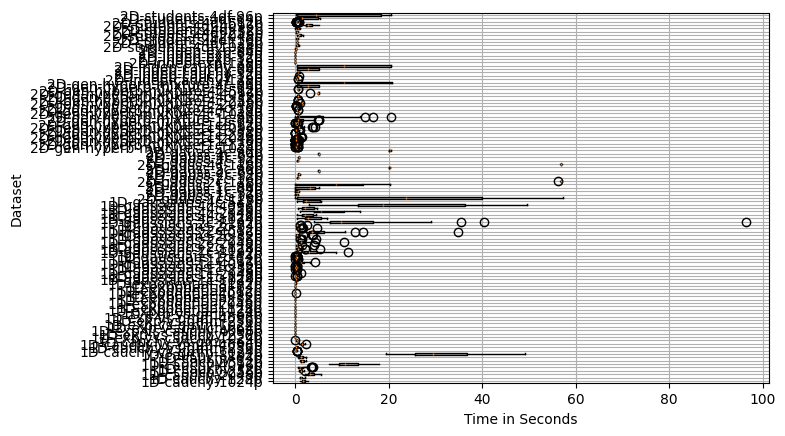

In [9]:
ds = df[["dataset", "name", "iterations", "time", "reg"]]
ds = ds.loc[(ds["name"] == "sinkhorn") & (ds["reg"] == 0.01)]

# ds = df[["dataset", "name", "iterations", "time"]]
# ds = ds.loc[(ds["name"] == "lp")]

time_sequence_by_dataset = [
    ds.loc[ds["dataset"] == dataset]["time"] for dataset in datasets
]

plt.boxplot(
    time_sequence_by_dataset,
    vert=False,
    tick_labels=datasets,
    patch_artist=False,
)
plt.ylabel("Dataset")
plt.xlabel("Time in Seconds")
plt.grid()
plt.show()

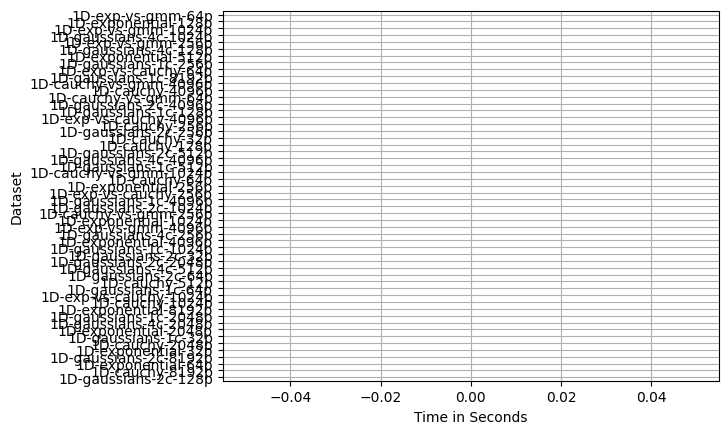

In [7]:
ds = df[["dataset", "name", "iterations", "time", "reg"]]
ds = ds.loc[(ds["name"] == "gradient-ascent") & (ds["reg"] == 1.0)]

time_sequence_by_dataset = [
    ds.loc[ds["dataset"] == dataset]["time"] for dataset in datasets
]

plt.boxplot(
    time_sequence_by_dataset,
    vert=False,
    tick_labels=datasets,
    patch_artist=False,
)
plt.ylabel("Dataset")
plt.xlabel("Time in Seconds")
plt.grid()
plt.show()

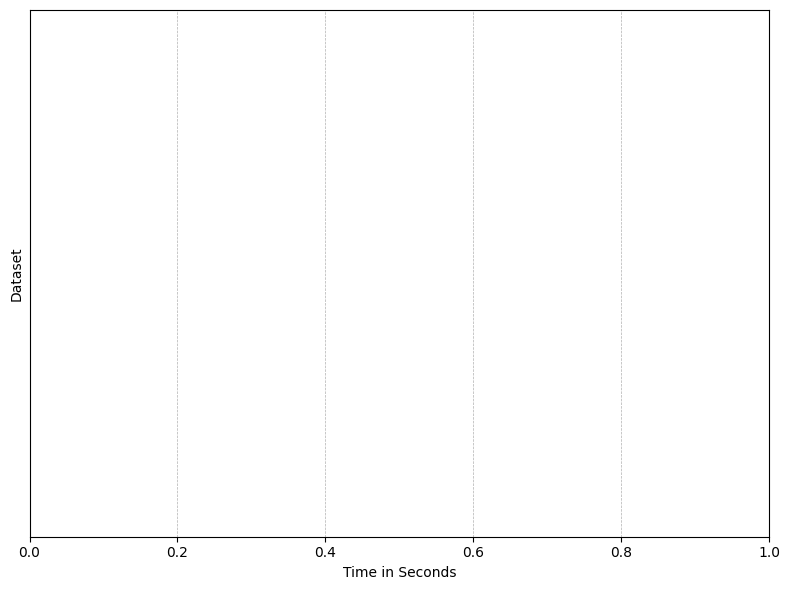

In [8]:
ds = df[["dataset", "name", "iterations", "time", "reg"]]
ds = ds.loc[(ds["name"] == "gradient-ascent") & (ds["reg"] == 1.0)]

# list of unique datasets, in the order you want them on the axis
datasets = ds["dataset"].unique().tolist()

# map each dataset to a y-position
y_positions = {dataset: i for i, dataset in enumerate(datasets)}

plt.figure(figsize=(8, 6))

# plot each point
for dataset in datasets:
    times = ds.loc[ds["dataset"] == dataset, "time"].values
    y = np.full_like(times, y_positions[dataset], dtype=float)
    plt.scatter(times, y, alpha=0.6)

# label the y-axis with the dataset names
plt.yticks(list(y_positions.values()), list(y_positions.keys()))

plt.xlabel("Time in Seconds")
plt.ylabel("Dataset")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

ValueError: zero-size array to reduction operation minimum which has no identity

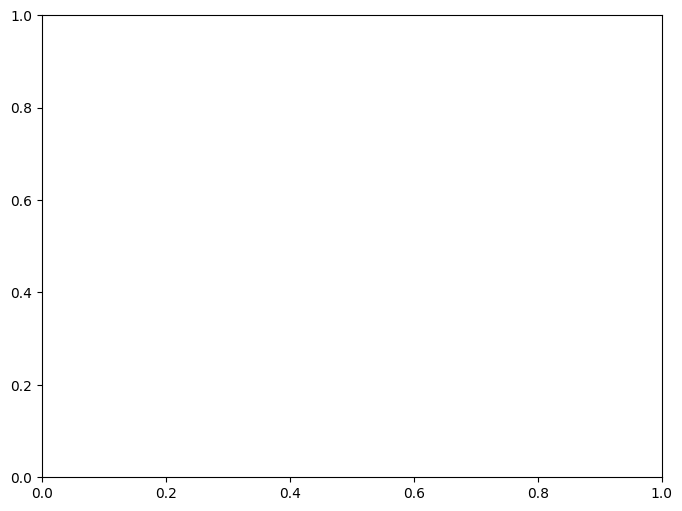

In [9]:
ds = df[["dataset", "name", "iterations", "time", "reg"]]
ds = ds[(ds["name"] == "gradient-ascent") & (ds["reg"] == 1.0)]

datasets = ds["dataset"].unique().tolist()

# build a list of time-arrays, one per dataset
time_sequence_by_dataset = [
    ds.loc[ds["dataset"] == dataset, "time"].values for dataset in datasets
]

# numeric positions
positions = np.arange(len(datasets))

plt.figure(figsize=(8, 6))

# create the violin plot
violin_parts = plt.violinplot(
    time_sequence_by_dataset,
    vert=False,
    positions=positions,
    showmeans=True,  # show mean marker
    showextrema=True,  # show min/max
    showmedians=True,  # show median line
)

# Optional styling:
for pc in violin_parts["bodies"]:
    pc.set_edgecolor("black")
    pc.set_alpha(0.7)

plt.yticks(positions, datasets)
plt.xlabel("Time in Seconds")
plt.ylabel("Dataset")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
ds = df[["dataset", "name", "iterations", "time", "reg"]]
ds = ds[(ds["name"] == "gradient-ascent") & (ds["reg"] == 1.0)]

# Violin plot
fig = px.violin(
    ds,
    x="time",
    y="dataset",
    orientation="h",
    box=True,  # draw box inside the violin
    points="all",  # show all points
    hover_data=["iterations"],
)
fig.update_layout(
    xaxis_title="Time in Seconds",
    yaxis_title="Dataset",
    template="plotly_white",
)
fig.show()

In [12]:
df_plot = df.copy()
df_plot = df_plot[df_plot["reg"] == 0.001]
df_plot = df_plot[df_plot["dataset"].str.startswith("1D-gaussians")]
# df_plot = df_plot[df_plot["dataset"].str.startswith("1D-cauchy")]

color_map = {
    "gradient-ascent": "#1f77b4",
    "sinkhorn": "#ff7f0e",
    "lp": "#2ca02c",
}

fig = px.violin(
    df_plot,
    x="time_counter",
    y="dataset",
    color="name",  # color by solver
    orientation="h",
    box=True,
    points="all",
    hover_data=["iterations"],
    color_discrete_map=color_map,  # force each solver to its color
)

fig.update_layout(
    title="Solver Timings Across All Datasets",
    xaxis_title="Time (s)",
    yaxis_title="Dataset",
    legend_title="Solver",
    template="plotly_white",
)

fig.show()

In [13]:
df_plot = df.copy()
df_plot = df_plot[df_plot["reg"] == 0.001]

color_map = {
    "gradient-ascent": "#1f77b4",
    "sinkhorn": "#ff7f0e",
    "lp": "#2ca02c",
}

fig = px.violin(
    df_plot,
    x="time",
    y="dataset",
    color="name",  # color by solver
    orientation="h",
    box=True,
    points="all",
    hover_data=["iterations", "reg"],
    color_discrete_map=color_map,  # force each solver to its color
)

fig.update_layout(
    title="Solver Timings Across All Datasets",
    xaxis_title="Time (s)",
    yaxis_title="Dataset",
    legend_title="Solver",
    template="plotly_white",
)

fig.show()

In [ ]:
df_plot = df.copy()
df_plot = df_plot[df_plot["reg"] == 1]

# define one color per solver
color_map = {
    "gradient-ascent": "#1f77b4",
    "sinkhorn": "#ff7f0e",
    "lp": "#2ca02c",
    # add any other solver names you have…
}

fig = px.violin(
    df_plot,
    x="iterations",
    y="dataset",
    color="name",  # color by solver
    orientation="h",
    box=True,
    points="all",
    hover_data=["iterations", "reg"],
    color_discrete_map=color_map,  # force each solver to its color
)

fig.update_layout(
    title="Solver Iterations Across All Datasets",
    xaxis_title="Iterations",
    yaxis_title="Dataset",
    legend_title="Solver",
    template="plotly_white",
)

fig.show()

In [ ]:
df_plot = df.copy()
df_plot = df_plot[df_plot["reg"] == 0.001]

# define one color per solver
color_map = {
    "gradient-ascent": "#1f77b4",
    "sinkhorn": "#ff7f0e",
    "lp": "#2ca02c",
    # add any other solver names you have…
}

fig = px.violin(
    df_plot,
    x="iterations",
    y="dataset",
    color="name",  # color by solver
    orientation="h",
    box=True,
    points="all",
    hover_data=["iterations", "reg"],
    color_discrete_map=color_map,  # force each solver to its color
)

fig.update_layout(
    title="Solver Iterations Across All Datasets",
    xaxis_title="Iterations",
    yaxis_title="Dataset",
    legend_title="Solver",
    template="plotly_white",
)

fig.show()

# Iterations vs. Problem Size (one sibplot per solver)

In [14]:
import pandas as pd

# ── 1) Prepare data ───────────────────────────────────────────────────────────
df_plot = df.copy()

# just use 1D for now
df_plot = df_plot[df_plot["dataset"].str.startswith("1D") == True]

# Extract numeric "size" from the dataset name (e.g. "data_100" → 100)
df_plot["size"] = df_plot["dataset"].str.extract(r"(\d+)p")

# List of solvers to plot
solvers = df_plot["name"].unique().tolist()
n_solvers = len(solvers)


# ── 2) Create subplot grid ────────────────────────────────────────────────────
fig = make_subplots(
    rows=1,
    cols=n_solvers,
    subplot_titles=solvers,
    shared_yaxes=True,  # align the Iterations axis
    x_title="Problem Size (# points)",
    y_title="Iterations",
)


# ── 3) Add one box‐plot per solver ─────────────────────────────────────────────
for col_idx, solver in enumerate(solvers, start=1):
    subset = df_plot[df_plot["name"] == solver]

    # Box‐plot of iterations grouped by problem size
    fig.add_trace(
        go.Box(
            x=subset["size"],
            y=subset["iterations"],
            name=solver,
            boxpoints="all",  # show all individual points
            jitter=0.3,  # spread out the points for visibility
            marker=dict(size=4, opacity=0.6),
            line=dict(width=1),
            showlegend=False,  # legend only once if you want, here it's per subplot title
        ),
        row=1,
        col=col_idx,
    )


# ── 4) Final layout tweaks ─────────────────────────────────────────────────────
fig.update_layout(
    title="Iterations vs. Problem Size by Solver (Box-Plot)",
    template="plotly_white",
    height=400,
    width=300 * n_solvers,
    margin=dict(t=60, b=50, l=50, r=50),
)

# Ensure each subplot has the same y-axis range
fig.update_yaxes(matches="y")

fig.show()

# Error vs. Problem Size

In [16]:
df_plot = df.copy()
df_plot = df_plot[df_plot["reg"] == 0.001]

# define one color per solver
color_map = {
    "gradient-ascent": "#1f77b4",
    "sinkhorn": "#ff7f0e",
    "lp": "#2ca02c",
    # add any other solver names you have…
}

fig = px.violin(
    df_plot,
    x="error",
    y="dataset",
    color="name",  # color by solver
    orientation="h",
    box=True,
    points="all",
    hover_data=["iterations", "reg"],
    color_discrete_map=color_map,  # force each solver to its color
)

fig.update_layout(
    title="Solver Error Across All Datasets",
    xaxis_title="Error",
    yaxis_title="Dataset",
    legend_title="Solver",
    template="plotly_white",
)

fig.show()


# # Same df_plot with numeric `size`
# fig = px.line(
#     df_plot,
#     x="size",
#     y="error",
#     color="name",
#     markers=True,
#     labels={"size": "Problem Size (# points)", "error": "Error"},
#     title="Error vs. Problem Size Across Solvers",
#     template="plotly_white",
# )

# fig.update_layout(legend_title="Solver")
# fig.show()

In [17]:
# ── 1) Prepare data ───────────────────────────────────────────────────────────
df_plot = df.copy()

# just use 1D for now
df_plot = df_plot[df_plot["dataset"].str.startswith("1D") == True]

# Extract numeric "size" from the dataset name (e.g. "data_100" → 100)
df_plot["size"] = df_plot["dataset"].str.extract(r"(\d+)p")

# List of solvers to plot
solvers = df_plot["name"].unique().tolist()
n_solvers = len(solvers)


# ── 2) Create subplot grid ────────────────────────────────────────────────────
fig = make_subplots(
    rows=1,
    cols=n_solvers,
    subplot_titles=solvers,
    shared_yaxes=True,  # align the Iterations axis
    x_title="Problem Size (# points)",
    y_title="Iterations",
)


# ── 3) Add one box‐plot per solver ─────────────────────────────────────────────
for col_idx, solver in enumerate(solvers, start=1):
    subset = df_plot[df_plot["name"] == solver]

    # Box‐plot of iterations grouped by problem size
    fig.add_trace(
        go.Box(
            x=subset["size"],
            y=subset["error"],
            name=solver,
            boxpoints="all",  # show all individual points
            jitter=0.3,  # spread out the points for visibility
            marker=dict(size=4, opacity=0.6),
            line=dict(width=1),
            showlegend=False,  # legend only once if you want, here it's per subplot title
        ),
        row=1,
        col=col_idx,
    )


# ── 4) Final layout tweaks ─────────────────────────────────────────────────────
fig.update_layout(
    title="Error vs. Problem Size by Solver (Box-Plot)",
    template="plotly_white",
    height=400,
    width=300 * n_solvers,
    margin=dict(t=60, b=50, l=50, r=50),
)

# Ensure each subplot has the same y-axis range
fig.update_yaxes(matches="y")

fig.show()

# Recources Usage vs. Problem Size

In [18]:
import pandas as pd
import plotly.express as px

# 1) filter & prep
df_plot = df[df["reg"] == 1].copy()
# extract numeric size if you need it, or leave dataset as-is
# df_plot["size"] = df_plot["dataset"].str.extract(r"(\d+)").astype(int)

# 2) melt memory metrics into long form
mem = df_plot.melt(
    id_vars=["dataset", "name"],
    value_vars=["peak_gpu_mem", "combined_peak_gpu_ram"],
    var_name="metric",
    value_name="value",
)
mem["metric_type"] = "Memory (MiB)"

# 3) melt utilization metrics
util = df_plot.melt(
    id_vars=["dataset", "name"],
    value_vars=["peak_util_pct", "mean_util_pct"],
    var_name="metric",
    value_name="value",
)
util["metric_type"] = "Utilization (%)"

# 4) concatenate
long = pd.concat([mem, util], ignore_index=True)

# 5) plot
fig = px.violin(
    long,
    x="value",
    y="dataset",
    color="name",  # color by solver
    facet_col="metric_type",  # two subplots
    orientation="h",
    box=True,
    points="all",  # show raw datapoints
    hover_data=["metric"],  # show which metric under the hood
    color_discrete_map=color_map,  # your solver→color map
    category_orders={"metric_type": ["Memory (MiB)", "Utilization (%)"]},
)

# 6) clean up axes & titles
# strip default “metric_type=…” annotation text
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[1]))
fig.update_layout(
    title="Resource Usage by Dataset and Solver",
    xaxis_title="",  # each facet has its own x-axis title
    yaxis_title="Dataset",
    legend_title="Solver",
    template="plotly_white",
    height=500,
    width=900,
)

# fix the individual x-axis labels
fig.update_xaxes(title_text="Memory (MiB)", matches=None, col=1)
fig.update_xaxes(title_text="Utilization (%)", matches=None, col=2)

fig.update_xaxes(
    showgrid=True,
    gridcolor="lightgrey",
    gridwidth=1,
    griddash="dash",  # or "dot", "dashdot", etc.
    zeroline=False,  # optional: hide the zero‐line if you don’t need it
)
fig.update_yaxes(
    showgrid=True,
    gridcolor="lightgrey",
    gridwidth=1,
    griddash="dash",
    zeroline=False,
)

fig.show()

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['peak_util_pct', 'mean_util_pct']"